In [1]:
import statsmodels

In [2]:
from statsmodels.formula.api import ols

In [3]:
import sys
sys.path.append(r"C:\Users\ehbaker\Documents\Python\Modules")

In [4]:
#import external libraries
import pandas as pd
import os
import numpy as np
import datetime
import pytz
import matplotlib.pyplot as plt
import calendar
from statsmodels.formula.api import ols

#plotting
%matplotlib notebook
import seaborn as sns
sns.set_style("whitegrid")
#import plot_funcs

#import my settings
from settings import Glacier, Station, base_path
import CleanWxData as wx
import plot_funcs

In [5]:
save_plots=True
save_dir='./figs/'+Glacier+Station+ '/trends/'

In [6]:
#Read in data
data_dir=base_path +"Data/"+Glacier+ r"/AllYears/Wx/LVL3/"
fl="Undercatch_Adj" + Glacier+ "_Daily_Weather.csv"
if Glacier =='SouthCascade':
    fl="Input_SouthCascade_Daily_Weather.csv"
    
if Glacier=='LemonCreek':
    fl="Input_LemonCreek_Daily_Weather.csv"
    data_dir=r"C:\Users\ehbaker\Documents\glacier-mass-balance-code-main/data/LemonCreek/Input/"
pth=os.path.join(data_dir, fl)
dat=pd.read_csv(pth)
print("read data from "+ pth)

#Set time index
dat.Date=pd.to_datetime(dat.Date, infer_datetime_format=True)
dat=dat.set_index('Date')

#Abbreviate precip column name
dat.rename(columns={'Precip_MeasuredWindSpeed_UndercatchAdj':'precip_adj'}, inplace=True)
#Add month column
dat['month']=dat.index.month

read data from C:\Users\ehbaker\Documents\glacier-mass-balance-code-main/data/LemonCreek/Input/Input_LemonCreek_Daily_Weather.csv


In [8]:
dat.Precipitation.last_valid_index()

Timestamp('2019-09-23 00:00:00')

In [9]:
#drop rows where both precip and temp are null; neccesary for glaciers that may have many leading or trailing NANs
#dat=dat[['Precipitation', 'Temperature']].dropna(how='all')

In [10]:
dat['month']=dat.index.month

In [11]:
#Define Seasons
summer_months=[6,7,8]
winter_months=[12,1,2]
spring_months=[3,4,5]
fall_months=[9,10,11]
season_list=[summer_months, winter_months, spring_months, fall_months]

In [12]:
#TOMORROW - Do the stuff in Biennek 2017! Woop Woop!

#first - need to read in daily high and low temps from: 
#"Q:\Project Data\GlacierData\Benchmark_Program\Data\Wolverine\AllYears\Wx\LVL2\emily\wolverine990_daily_LVL2.csv"

In [13]:
startdate_minmax=dat.Temperature.first_valid_index()

In [14]:
dat['PrecipR3']=dat.Precipitation.rolling(3, center=True).mean() #3 day moving window avg.

In [15]:
dat['temp_anomaly']=(dat.Temperature -dat.Temperature.mean())/dat.Temperature.std()

In [16]:
dat_overall_highest_temps=dat[dat.index.isin(dat.Temperature.nlargest(10).index)].copy()

In [17]:
dat_overall_lowest_temps=dat[dat.index.isin(dat.Temperature.nsmallest(10).index)].copy()

In [18]:
#Dataframe of all the hottest temperatures on record for each season
hot_temp_dat=pd.DataFrame()
for season in season_list:
    print(season)
    season_dat=dat[dat.month.isin(season)]
    dat2=season_dat[season_dat.index.isin(season_dat.Temperature.nlargest(10).index)].copy()
    if season==[12,1,2]:
        dat2['season']='Winter'
    if season==[9,10,11]:
        dat2['season']='Fall'
    if season==[3,4,5]:
        dat2['season']='Spring'
    if season==[6,7,8]:
        dat2['season']='Summer'
    hot_temp_dat=hot_temp_dat.append(dat2)

[6, 7, 8]
[12, 1, 2]
[3, 4, 5]
[9, 10, 11]


In [19]:
#Dataframe of all the COLDEST temperatures on record for each season
cold_temp_dat=pd.DataFrame()
for season in season_list:
    print(season)
    season_dat=dat[dat.month.isin(season)]
    dat2=season_dat[season_dat.index.isin(season_dat.Temperature.nsmallest(10).index)].copy()
    if season==[12,1,2]:
        dat2['season']='Winter'
    if season==[9,10,11]:
        dat2['season']='Fall'
    if season==[3,4,5]:
        dat2['season']='Spring'
    if season==[6,7,8]:
        dat2['season']='Summer'
    cold_temp_dat=cold_temp_dat.append(dat2)

[6, 7, 8]
[12, 1, 2]
[3, 4, 5]
[9, 10, 11]


In [20]:
#Dataframe of all the HIGHEST PRECIP on record for each season (on 3-day smoothed precip events)
high_precip_dat=pd.DataFrame()
for season in season_list:
    print(season)
    season_dat=dat[dat.month.isin(season)]
    dat2=season_dat[season_dat.index.isin(season_dat.PrecipR3.nlargest(10).index)].copy()
    if season==[12,1,2]:
        dat2['season']='Winter'
    if season==[9,10,11]:
        dat2['season']='Fall'
    if season==[3,4,5]:
        dat2['season']='Spring'
    if season==[6,7,8]:
        dat2['season']='Summer'
    high_precip_dat=high_precip_dat.append(dat2)

[6, 7, 8]
[12, 1, 2]
[3, 4, 5]
[9, 10, 11]


In [21]:
# #Dataframe of all precip (non-trace) split by phase
# phase_freq_dat=pd.DataFrame()
# for season in season_list:
#     print(season)
#     season_dat=dat[dat.month.isin(season)]
#     dat2=season_dat[season_dat.index.isin(season_dat[season_dat.Precipitation>3].index)].copy()
#     if season==[12,1,2]:
#         dat2['season']='Winter'
#     if season==[9,10,11]:
#         dat2['season']='Fall'
#     if season==[3,4,5]:
#         dat2['season']='Spring'
#     if season==[6,7,8]:
#         dat2['season']='Summer'
#     phase_freq_dat=phase_freq_dat.append(dat2)

In [22]:
def define_decades(dat2, possible_decades):
    decades=pd.Series(dat2.index.year).astype('str').str.slice(0,3) +'0'
    dat2['decades']=decades.values
    dat2['decades']=pd.Categorical(decades, categories=possible_decades)    
    return(dat2)

In [23]:
if (Glacier + Station == ('Wolverine990') )| (Glacier + Station==('Gulkana1480')):
    decade_list=['1970', '1980', '1990', '2000', '2010']

In [24]:
if Glacier + Station == ('Sperry2440'):
    decade_list=['2000', '2010']

In [25]:
if Glacier+Station=='SouthCascade270':
        decade_list=['1950', '1960', '1970', '1980', '1990', '2000', '2010']

In [26]:
if Glacier+Station=='LemonCreek5':
        decade_list=['1950', '1960', '1970', '1980', '1990', '2000', '2010']

In [27]:
Glacier+Station

'LemonCreek5'

In [28]:
dat.tail(1)

,Temperature,Precipitation,Elevation,Units,Source,Station_ID,month,PrecipR3,temp_anomaly
Date,,,,,,,,,
2019-12-31,NaN,NaN,4.9,SCI,JUNEAU,USW00025309,12,NaN,NaN


In [29]:
#Create categorical variable for decade
hot_temp_dat=define_decades(hot_temp_dat, decade_list)
cold_temp_dat=define_decades(cold_temp_dat, decade_list)
high_precip_dat=define_decades(high_precip_dat, decade_list)
dat_overall_highest_temps=define_decades(dat_overall_highest_temps, decade_list)
dat_overall_lowest_temps=define_decades(dat_overall_lowest_temps, decade_list)

In [30]:
hot_temp_dat['season']=pd.Categorical(hot_temp_dat.season, categories=['Winter', 'Fall', 'Spring', 'Summer'], ordered=True)
cold_temp_dat['season']=pd.Categorical(cold_temp_dat.season, categories=['Winter', 'Fall', 'Spring', 'Summer'], ordered=True)
high_precip_dat['season']=pd.Categorical(high_precip_dat.season, categories=['Winter', 'Fall', 'Spring', 'Summer'], ordered=True)

In [31]:
#dat[: first_bin_year]

In [32]:
pre_first_bin_year=str(pd.to_numeric(decade_list[0])-1)
extra_years_in_first_bin=pd.Series(dat[str(dat.Temperature.first_valid_index().year): pre_first_bin_year].index.year).unique()
n_extra_yrs_first_bin=len(extra_years_in_first_bin)

In [33]:
n_extra_yrs_first_bin

2

In [34]:
post_last_bin_year=str(pd.to_numeric(decade_list[-1]))

In [35]:
n_years_in_last_quasi_decade=len(pd.Series(dat[post_last_bin_year:].index.year).unique())

In [36]:
n_years_in_last_quasi_decade

10

In [37]:
decade_list

['1950', '1960', '1970', '1980', '1990', '2000', '2010']

In [38]:
#Construct axis labels
ax_labs=pd.Series()
for x in decade_list:
    lab0=x + '-' +x[:-1]+ '9'
    ax_labs=ax_labs.append(pd.Series(lab0))

In [39]:
ax_labs=ax_labs.reset_index(drop=True)
#change first label

ax_labs[0]=str(dat.Precipitation.first_valid_index().year)+ '-' +ax_labs[0].split('-')[1]
ax_labs=ax_labs.values

In [40]:
print('stop: code, assumes that first and last decades incomplete; first is lumped, final is kept separate')

stop: code, assumes that first and last decades incomplete; first is lumped, final is kept separate


C:\Users\ehbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


pval = 0.5134188183716881
pval = 0.3985826401080095
pval = 0.19758522875986068
significant: Summer high temperature; pval= 0.09212031804624964
significant: Winter cold temperature; pval= 0.02362387352119972
pval = 0.5088279116912664
pval = 0.10855410191477287
significant: Summer cold temperature; pval= 0.01140851682754089
pval = 0.9101509021566865
pval = 0.6235568574201842
pval = 0.30218917732498257
significant: Summer high precipitation; pval= 0.011887194539782668


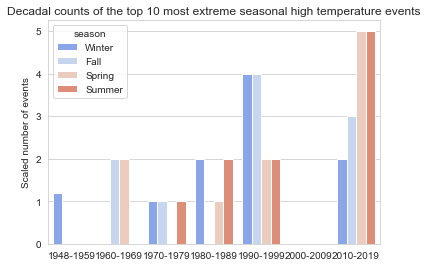

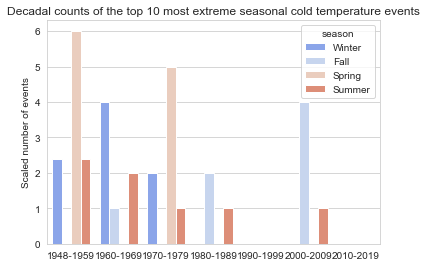

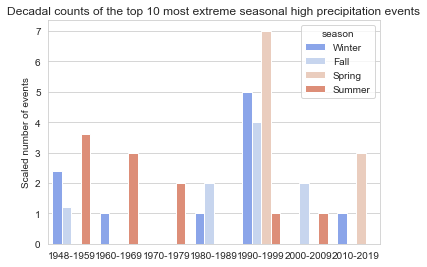

In [41]:
#See if there is a trend in these counts of extreme events

#fig, axs = plt.subplots(3,1, sharex=True, sharey=True)
allstats_df=pd.DataFrame()
df_list=[hot_temp_dat, cold_temp_dat, high_precip_dat]
df_nmz=['high temperature', 'cold temperature', 'high precipitation']
for ii in range(0, len(df_list)):
    df=df_list[ii]
    df.name=df_nmz[ii]
    var='Temperature'
    if df.equals(high_precip_dat):
        var='Precipitation'

    #Bin early years (not full decade) into the first decade
    df.loc[df.decades==pd.np.nan, 'decades']=df.decades[1]

    #Count occurances in each decade
    count_df=df[[var, 'season', 'decades']].groupby(['season', 'decades']).count()
    count_df.reset_index(inplace=True)
    count_df[var]=count_df[var].fillna(value=0).copy()
    count_df

    #Deal with semi-decades (more or less than 10 yr bins)
    count_df.loc[count_df.decades==decade_list[-1], var]=count_df.loc[count_df.decades==decade_list[-1], var]* (10./n_years_in_last_quasi_decade) #  incomplete decade scaled by the number of years in the decade
    count_df.loc[count_df.decades==decade_list[0], var]=count_df.loc[count_df.decades==decade_list[0], var] *((10.+n_extra_yrs_first_bin)/10)

    count_df['decimal_date']=count_df.decades.astype('float')+5
    #count_df['decades']=count_df['decades'].astype(str)

    
    #count_df=count_df[count_df.decades!= decade_list[0]] #remove 1960s; remains as a remnant of the categorical variable, though has been moved to the 70s

    plt.figure()
    ax=sns.barplot(x="decades", y=var, hue="season", data=count_df, palette='coolwarm')
    plt.ylabel("Scaled number of events")
    plt.Axes.set_xticklabels(ax, labels=ax_labs) #need to exclude first label of the partial decade 
    plt.title("Decadal counts of the top 10 most extreme seasonal " +df.name + " events")
    plt.tight_layout()
    plt.xlabel("")
    plt.savefig(save_dir + 'WeatherExtremes/' +Glacier + Station + '_' + df.name +'_frequency.jpg')
    
    
    #See if any seasonal trends are significant
    for seas in count_df.season.unique():
        lm1 = ols(var+ ' ~ decimal_date', data=count_df[count_df.season==seas]).fit()
        pval=lm1.pvalues['decimal_date']

        single_stats_df=plot_funcs.make_OLS_stats_table(var, 'decimal_date', count_df[count_df.season==seas])
        single_stats_df['season']=seas
        single_stats_df['variable']=df.name
        
        if pval<0.1:
            print ("significant: " + seas + " " + df.name+ "; pval= " + str(pval) )
        else:
            print("pval = " + str(pval))
        allstats_df=allstats_df.append(single_stats_df)

In [42]:
save_dir + 'WeatherExtremes/' +Glacier + Station + '_' + df.name +'_frequency.jpg'

'./figs/LemonCreek5/trends/WeatherExtremes/LemonCreek5_high precipitation_frequency.jpg'

In [78]:
allstats_df.sort_values(by='kt_pval')

,r2,r2_p,slope,kendall_tau,kt_pval,conf_low,conf_high,season,variable,Glacier,Station
0,0.703125,0.011409,-20.659722,-0.793884,0.017235,-7.042648,-34.276796,Summer,cold temperature,LemonCreek,5
0,0.698417,0.011887,-13.267754,-0.750939,0.021143,-4.430675,-22.104834,Summer,high precipitation,LemonCreek,5
0,0.608601,0.023624,-10.969388,-0.732467,0.029498,-2.195908,-19.742868,Winter,cold temperature,LemonCreek,5
0,0.356522,0.092120,8.115942,0.582182,0.080716,18.148490,-1.916606,Summer,high temperature,LemonCreek,5
0,0.318627,0.108554,-5.261438,-0.592157,0.087071,1.671470,-12.194346,Spring,cold temperature,LemonCreek,5
0,0.050980,0.302189,3.660131,0.460566,0.183248,11.842154,-4.521893,Spring,high precipitation,LemonCreek,5
0,0.167391,0.197585,6.594203,0.370479,0.266380,18.006282,-4.817876,Spring,high temperature,LemonCreek,5
0,-0.092053,0.513419,4.664363,0.250313,0.442206,21.719533,-12.390807,Winter,high temperature,LemonCreek,5
0,-0.025455,0.398583,5.090909,0.205738,0.530495,19.276444,-9.094626,Fall,high temperature,LemonCreek,5
0,-0.089796,0.508828,4.285714,0.169031,0.615435,19.778995,-11.207567,Fall,cold temperature,LemonCreek,5


In [79]:
allstats_df['Glacier']=Glacier
allstats_df['Station']=Station
allstats_df.to_csv(save_dir+'WeatherExtremes/stats_table.csv', index=False)

In [80]:
#look at PDO

In [81]:
PDO_dat=pd.read_csv("Q:\Project Data\GlacierData\WeatherStations\Climate_Indices\PDO_ENSO_Pretty.csv")

In [82]:
PDO_dat.Date=pd.to_datetime(PDO_dat.Date, format='%Y%m')
PDO_dat=PDO_dat.set_index('Date')

In [83]:
#Aggregate to Monthly data
mth_dat=pd.DataFrame()
mth_dat['precip']=wx.aggregate_time_with_threshold(dat['Precipitation'], 'MS', func='sum', steps_in_period=30)
mth_dat['min_temp']=wx.aggregate_time_with_threshold(dat['Temperature'], 'MS', func='min', steps_in_period=30)
mth_dat['max_temp']=wx.aggregate_time_with_threshold(dat['Temperature'], 'MS', func='max', steps_in_period=30)
mth_dat['mean_temp']=wx.aggregate_time_with_threshold(dat['Temperature'], 'MS', func='mean', steps_in_period=30)

#Temperature Anomaly
mth_dat['temp_anomaly']=(mth_dat.mean_temp-mth_dat.mean_temp.mean())/mth_dat.mean_temp.std()

#precip anomaly
mth_dat['precip_anomaly']=(mth_dat.precip-mth_dat.precip.mean())/mth_dat.precip.std()

mth_dat['month']=mth_dat.index.month

In [84]:
#Combine monthly weather data with PDO data
PDO_dat=mth_dat.merge(PDO_dat, left_index=True, right_index=True, how='outer')
PDO_dat['month']=PDO_dat.index.month

In [85]:
PDO_dat['decimal_date']=PDO_dat.index.year+(PDO_dat.index.dayofyear-1)/365

In [94]:
summer_dat=PDO_dat[PDO_dat.month.isin(summer_months)].copy()
winter_dat=PDO_dat[PDO_dat.month.isin(winter_months)].copy()
spring_dat=PDO_dat[PDO_dat.month.isin(spring_months)].copy()
fall_dat=PDO_dat[PDO_dat.month.isin(fall_months)].copy()
winter_dat['winter_temp_anomaly']=(winter_dat.mean_temp-winter_dat.mean_temp.mean())/winter_dat.mean_temp.std()

<IPython.core.display.Javascript object>


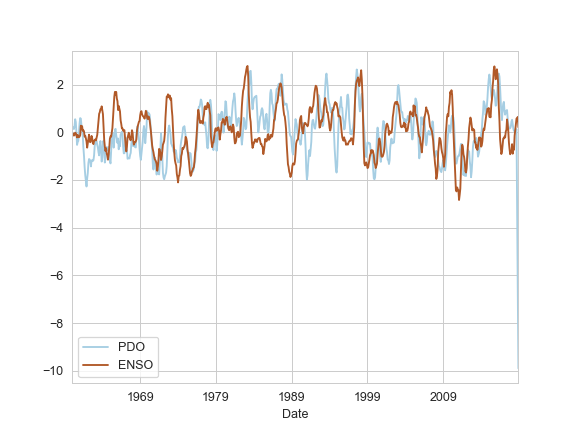

In [95]:
%matplotlib notebook
PDO_dat[['PDO', 'ENSO']]['1960':'2018'].rolling(3).mean().plot(colormap='Paired')
plt.savefig(save_dir + 'WeatherExtremes/' +"ENSO and PDO Simple Plot.jpg")

In [70]:
PDO_dat.head()

#Add season
    if season==[12,1,2]:
        dat2['season']='Winter'
    if season==[9,10,11]:
        dat2['season']='Fall'
    if season==[3,4,5]:
        dat2['season']='Spring'
    if season==[6,7,8]:
        dat2['season']='Summer'

,precip,min_temp,max_temp,mean_temp,temp_anomaly,precip_anomaly,month,Year,Month,PDO,ENSO,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,decimal_date
Date,,,,,,,,,,,,,,,,,,
1945-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945.000000
1945-02-01,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945.084932
1945-03-01,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945.161644
1945-04-01,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945.246575
1945-05-01,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945.328767


In [104]:
#ADD COLUMN FOR SEASON NAME
PDO_dat['season']=pd.np.nan
for season in season_list:
    if season==[12,1,2]:
        seas_nm='Winter'
    if season==[9,10,11]:
        seas_nm='Fall'
    if season==[3,4,5]:
        seas_nm='Spring'
    if season==[6,7,8]:
        seas_nm='Summer'
    print(seas_nm)
    PDO_dat.loc[PDO_dat.month.isin(season), 'season']=seas_nm

Summer
Winter
Spring
Fall


In [148]:
PDO_dat.head(1)

,precip,min_temp,max_temp,mean_temp,temp_anomaly,precip_anomaly,month,Year,Month,PDO,ENSO,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,decimal_date,season
Date,,,,,,,,,,,,,,,,,,,
1945-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945.0,Winter


In [149]:
#See if any seasonal OLS predictions are significant
vars=['precip', 'mean_temp', 'temp_anomaly', 'precip_anomaly', 'min_temp', 'max_temp']
var='precip'
PDO_dat
allstats_df=pd.DataFrame()
for var in vars:
    print(var)
    for season in ['Summer', 'Winter', 'Fall', 'Spring', 'All']:
        print('   ' + season)
        season_dat=PDO_dat[PDO_dat.season==season]
        if season=='All':
            season_dat=PDO_dat.copy()
        dat2=season_dat.copy()

        single_stats_df=plot_funcs.make_OLS_stats_table('ENSO', var, dat2, robust=True)
        single_stats_df['season']=season
        single_stats_df['variable']=var

        allstats_df=allstats_df.append(single_stats_df)

precip
   Summer
   Winter
   Fall
   Spring
   All
mean_temp
   Summer
   Winter
   Fall
   Spring
   All
temp_anomaly
   Summer
   Winter
   Fall
   Spring

C:\Users\ehbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)



   All
precip_anomaly
   Summer
   Winter
   Fall
   Spring
   All
min_temp
   Summer
   Winter
   Fall
   Spring
   All
max_temp
   Summer
   Winter
   Fall
   Spring
   All


In [150]:
allstats_df.sort_values(by=['season','kt_pval'], inplace=True)

In [151]:
allstats_df.to_csv(save_dir+'WeatherExtremes/ENSO_stats_table_temp_and_precip.csv', index=False)

In [99]:
PDO_dat.loc[PDO_dat.month.isin(season)]

,precip,min_temp,max_temp,mean_temp,temp_anomaly,precip_anomaly,month,Year,Month,PDO,ENSO,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,decimal_date
Date,,,,,,,,,,,,,,,,,,
1945-09-01,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945.665753
1945-10-01,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945.747945
1945-11-01,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1945.832877
1946-09-01,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1946.665753
1946-10-01,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1946.747945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01,264.9,2.85,10.25,7.495161,0.378265,2.047651,10,2018.0,10.0,-9.9,0.24,NaN,NaN,NaN,NaN,NaN,NaN,2018.747945
2018-11-01,142.2,-2.20,8.90,3.625000,-0.226725,0.260043,11,2018.0,11.0,-9.9,0.62,NaN,NaN,NaN,NaN,NaN,NaN,2018.832877
2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,9,2019.0,9.0,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,2019.665753


C:\Users\ehbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<IPython.core.display.Javascript object>


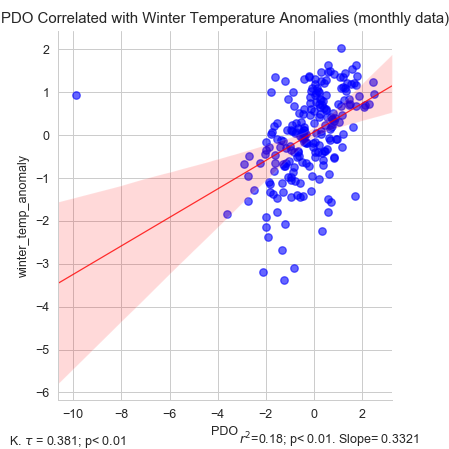

In [71]:
plot_funcs.OLS_plot('PDO', 'winter_temp_anomaly', dat=winter_dat, aspect=1, title='PDO Correlated with Winter Temperature Anomalies (monthly data)')
plt.tight_layout()

plt.savefig(save_dir + 'WeatherExtremes/' +Glacier + Station + '_CorrelationofPDOAndWinterTemperatureAnomalies.jpg')

In [89]:
PDO_dat.columns

Index(['precip', 'min_temp', 'max_temp', 'mean_temp', 'temp_anomaly',
       'precip_anomaly', 'month', 'Year', 'Month', 'PDO', 'ENSO', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'decimal_date'],
      dtype='object')

<IPython.core.display.Javascript object>


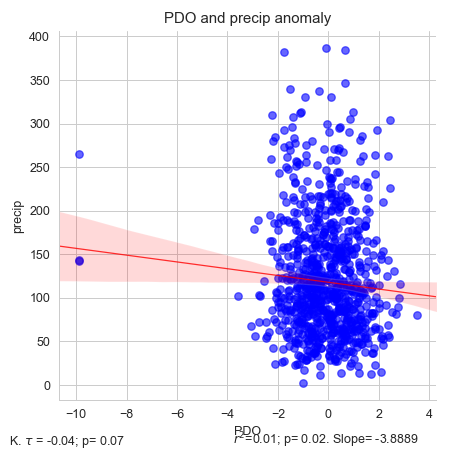

,r2,r2_p,slope,kendall_tau,kt_pval,conf_low,conf_high
0,0.013559,0.029836,-3.888852,-0.041498,0.07119,-0.380056,-7.397648


In [92]:
a=plot_funcs.OLS_plot('PDO', '', dat=PDO_dat, aspect=1, title='PDO and precip anomaly', robust=True)
plt.tight_layout()

a

C:\Users\ehbaker\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<IPython.core.display.Javascript object>


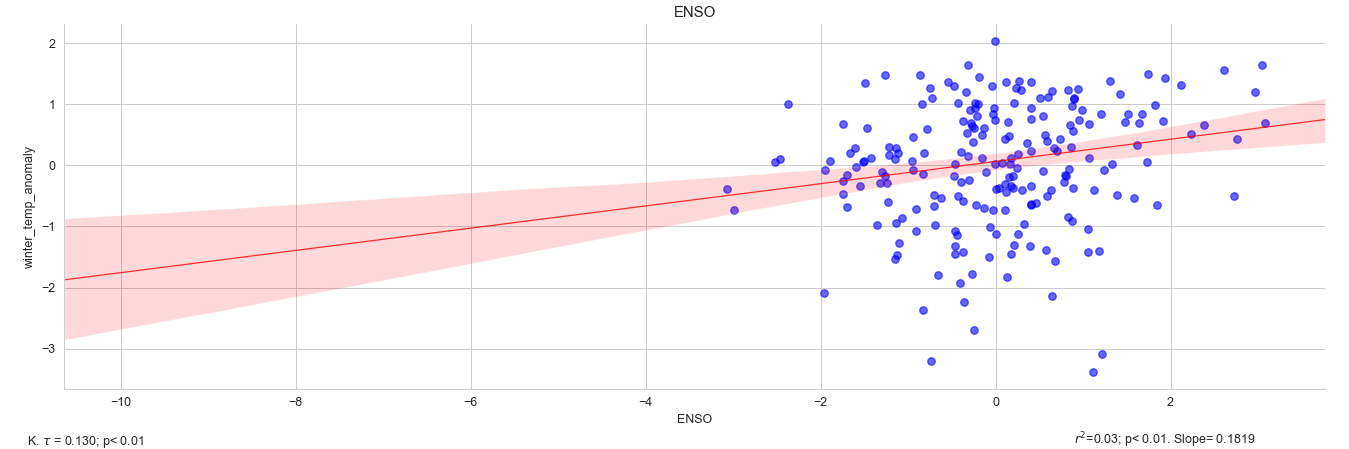

,r2,r2_p,slope,kendall_tau,kt_pval,conf_low,conf_high
0,0.030352,0.002172,0.181903,0.130613,0.004621,0.298198,0.065609


In [73]:
plot_funcs.OLS_plot('ENSO', 'winter_temp_anomaly', dat=winter_dat, robust=True, title='ENSO')

In [74]:
#Add decimal date for regression
PDO_dat['decimal_date']=PDO_dat.index.year+(PDO_dat.index.dayofyear-1)/365

In [75]:
import statsmodels.api as sm
col_x=['decimal_date', 'PDO']
col_y='mean_temp'

y = PDO_dat[col_x]
X = PDO_dat[col_y]
X = sm.add_constant(X)
res = sm.OLS(y, X, missing='drop').fit()
pval=res.pvalues[col_x]
r2=res.rsquared_adj
slope=res.params[col_x]


ValueError: shapes (846,2) and (846,2) not aligned: 2 (dim 1) != 846 (dim 0)

In [ ]:
y = PDO_dat.mean_temp
X = PDO_dat[['decimal_date', 'PDO']]
X = sm.add_constant(X)
model1 = sm.OLS(y, X, missing='drop').fit()
model1.summary()

In [ ]:
y = PDO_dat.mean_temp
X = PDO_dat[['decimal_date']]
X = sm.add_constant(X)
model2 = sm.OLS(y, X, missing='drop').fit()
model2.summary()

In [ ]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

m01 = ols('temp_anomaly ~ decimal_date', data=PDO_dat).fit()
m02 = ols('temp_anomaly ~ decimal_date + PDO', data=PDO_dat).fit()
anovaResults = anova_lm(m01, m02)

In [ ]:
anovaResults

In [ ]:
m02.summary()

In [ ]:
m02.params

In [ ]:
m01.params

In [76]:
#Aggregate to YEARLY for plot
y_dat=pd.DataFrame()
y_dat['precip']=wx.aggregate_time_with_threshold(PDO_dat['precip'], 'AS', func='sum', steps_in_period=12, threshold=0.01)
y_dat['mean_temp']=wx.aggregate_time_with_threshold(PDO_dat['mean_temp'], 'AS', func='mean', steps_in_period=12, threshold=0.1)
y_dat['PDO']=wx.aggregate_time_with_threshold(PDO_dat['PDO'], 'AS', func='mean', steps_in_period=12)
#Temperature Anomaly
y_dat['temp_anomaly']=(y_dat.mean_temp-y_dat.mean_temp.mean())/y_dat.mean_temp.std()
y_dat['precip_anomaly']=(y_dat.precip-y_dat.precip.mean())/y_dat.mean_temp.std()
y_dat['precip_anom_frac_avg']=(y_dat.precip-y_dat.precip.mean())/y_dat.precip.mean()


y_dat['year']=y_dat.index.year

#y_dat=y_dat['1968':'2016'] #Subset to only FULL years

<IPython.core.display.Javascript object>


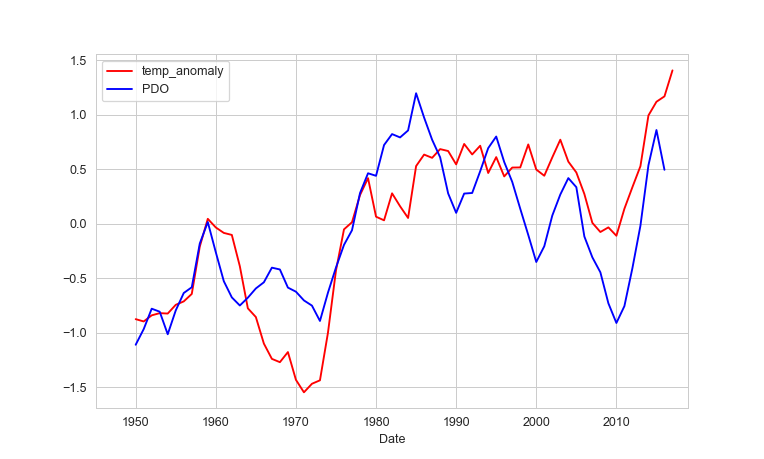

In [77]:
#5-year moving window avg of PDO and temperature anomalies
#plt.figure()
var_cols=['temp_anomaly', 'PDO']
ax=y_dat[var_cols].rolling(5, min_periods=5, center=True).mean().plot(color=['red','blue'])
plt.savefig(save_dir + 'WeatherExtremes/' +Glacier + Station + '_PDOandTempAnomaly_TS_5yrmvngavg.jpg')

In [ ]:
plot_funcs.OLS_plot('PDO', 'precip', dat=y_dat)

In [ ]:
var_cols=['precip_anom_frac_avg', 'PDO']

ax=y_dat[var_cols].rolling(5, min_periods=5, center=True).mean().plot(color=['red','blue'])
ax.legend(["Precipitation Anomaly Fraction of Average", "PDO"])
plt.savefig(save_dir + 'WeatherExtremes/' +Glacier + Station + '_PDOandPrecip_TS_5yrmvngavg.jpg')